In [20]:
import os

In [77]:
os.chdir("E:\线性回归之玩转金郡 code")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

In [169]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [170]:
sales.tail()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


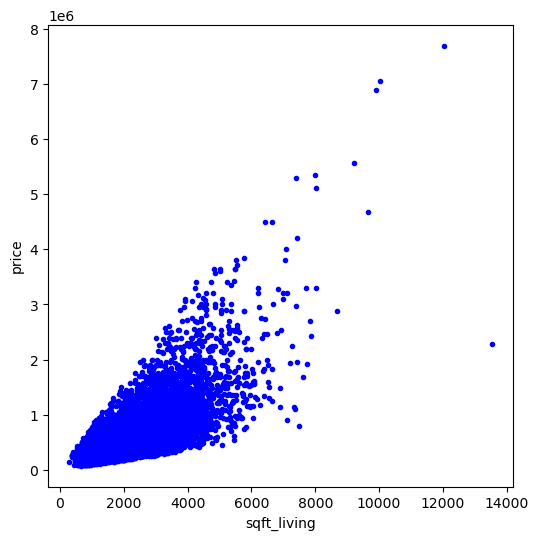

In [171]:
fig = plt.figure(figsize=(6,6), dpi=100)  
plt.plot( sales['sqft_living'], sales['price'], 'b.' )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [110]:
(training_data,test_data)=train_test_split( sales, train_size=0.8, random_state=0 )

In [111]:
print( 'The number of rows and columns of training data is', training_data.shape )
print( 'The number of rows and columns of test data is', test_data.shape )

The number of rows and columns of training data is (17290, 21)
The number of rows and columns of test data is (4323, 21)


In [112]:
ratio=training_data.shape[0]/test_data.shape[0]
print('the ratio is',ratio)

the ratio is 3.999537358315984


In [165]:
input_label = ['sqft_living']
output_label = ['price']

training_input = training_data[input_label].values
training_output  = training_data[output_label].values
test_input = test_data[input_label].values
test_output  = test_data[output_label].values

In [166]:
model = LinearRegression()
model.fit( training_input, training_output )

LinearRegression()

In [167]:
print( 'Benchmark Solution:' )
print( 'Intercept:', model.intercept_[0] )
print( 'Slope    :', model.coef_[0][0] )
print( "MSE      : %.2f" % np.mean((model.predict(test_input) - test_output) ** 2) )

Benchmark Solution:
Intercept: -48536.690058289096
Slope    : 284.1477103801124
MSE      : 62014619472.34


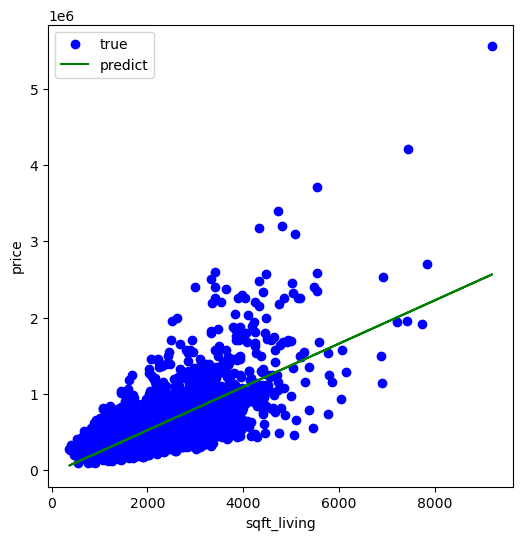

In [168]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter( test_input, test_output,  color='blue', label="true" )
plt.plot( test_input, model.predict(test_input), color='green', label="predict" )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show()